## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

C:\Users\ASUS\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Setting up directory paths

In [2]:
# Base directory
base_dir = '.'

print(f"Base directory: {base_dir}")

Base directory: .


In [3]:
# Training data directory
train_dir = os.path.join(base_dir, 'train')

print(f"Training directory: {train_dir}")

Training directory: .\train


In [4]:
# Validation data directory
validation_dir = os.path.join(base_dir, 'validation')

print(f"Validation directory: {validation_dir}")

Validation directory: .\validation


In [5]:
# Sample images directory
sample_dir = os.path.join(base_dir, 'sample_images')

print(f"Sample images directory: {sample_dir}")

Sample images directory: .\sample_images


In [6]:
# How many images is in each folder
train_neozep = len(os.listdir(os.path.join(train_dir, 'Neozep')))
train_medicol = len(os.listdir(os.path.join(train_dir, 'Medicol')))
train_kremils = len(os.listdir(os.path.join(train_dir, 'KremilS')))
train_fishoil = len(os.listdir(os.path.join(train_dir, 'FishOil')))
train_decolgen = len(os.listdir(os.path.join(train_dir, 'Decolgen')))
train_dayzinc = len(os.listdir(os.path.join(train_dir, 'DayZinc')))
train_biogesic = len(os.listdir(os.path.join(train_dir, 'Biogesic')))
train_bioflu = len(os.listdir(os.path.join(train_dir, 'Bioflu')))
train_bactidol = len(os.listdir(os.path.join(train_dir, 'Bactidol')))
train_alaxan = len(os.listdir(os.path.join(train_dir, 'Alaxan')))

print(f"Training Neozep: {train_neozep} images")
print(f"Training Medicol: {train_medicol} images")
print(f"Training Kremil S: {train_kremils} images")
print(f"Training Fish Oil: {train_fishoil} images")
print(f"Training Decolgen: {train_decolgen} images")
print(f"Training DayZinc: {train_dayzinc} images")
print(f"Training Biogesic: {train_biogesic} images")
print(f"Training Bioflu: {train_bioflu} images")
print(f"Training Bactidol: {train_bactidol} images")
print(f"Training Alaxan: {train_alaxan} images")

Training Neozep: 800 images
Training Medicol: 800 images
Training Kremil S: 800 images
Training Fish Oil: 800 images
Training Decolgen: 800 images
Training DayZinc: 800 images
Training Biogesic: 800 images
Training Bioflu: 800 images
Training Bactidol: 800 images
Training Alaxan: 800 images


In [7]:
# How many images is in each folder
val_neozep = len(os.listdir(os.path.join(validation_dir, 'Neozep')))
val_medicol = len(os.listdir(os.path.join(validation_dir, 'Medicol')))
val_kremils = len(os.listdir(os.path.join(validation_dir, 'KremilS')))
val_fishoil = len(os.listdir(os.path.join(validation_dir, 'FishOil')))
val_decolgen = len(os.listdir(os.path.join(validation_dir, 'Decolgen')))
val_dayzinc = len(os.listdir(os.path.join(validation_dir, 'DayZinc')))
val_biogesic = len(os.listdir(os.path.join(validation_dir, 'Biogesic')))
val_bioflu = len(os.listdir(os.path.join(validation_dir, 'Bioflu')))
val_bactidol = len(os.listdir(os.path.join(validation_dir, 'Bactidol')))
val_alaxan = len(os.listdir(os.path.join(validation_dir, 'Alaxan')))

print(f"Validation Neozep: {val_neozep} images")
print(f"Validation Medicol: {val_medicol} images")
print(f"Validation Kremil S: {val_kremils} images")
print(f"Validation Fish Oil: {val_fishoil} images")
print(f"Validation Decolgen: {val_decolgen} images")
print(f"Validation DayZinc: {val_dayzinc} images")
print(f"Validation Biogesic: {val_biogesic} images")
print(f"Validation Bioflu: {val_bioflu} images")
print(f"Validation Bactidol: {val_bactidol} images")
print(f"Validation Alaxan: {val_alaxan} images")

Validation Neozep: 200 images
Validation Medicol: 200 images
Validation Kremil S: 200 images
Validation Fish Oil: 200 images
Validation Decolgen: 200 images
Validation DayZinc: 200 images
Validation Biogesic: 200 images
Validation Bioflu: 200 images
Validation Bactidol: 200 images
Validation Alaxan: 200 images


## Sample image visualization

In [8]:
samp_image_path = os.path.join(sample_dir, '00000000.jpg')

print(f"Loading image from: {samp_image_path}")

Loading image from: .\sample_images\00000000.jpg


In [9]:
samp_image = Image.open(samp_image_path)

print(f"Image loaded successfully!")
print(f"Image format: {samp_image.format}")
print(f"Image mode: {samp_image.mode}")
print(f"Image size: {samp_image.size}")

Image loaded successfully!
Image format: JPEG
Image mode: RGB
Image size: (300, 300)


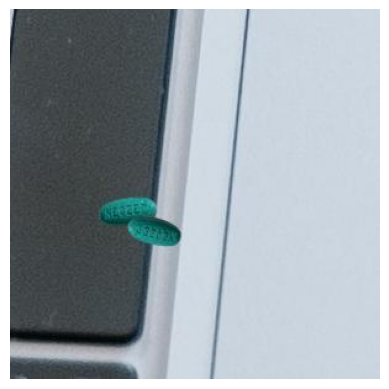

In [10]:
# display the image
plt.imshow(samp_image)
plt.axis('off')
plt.show()

In [11]:
samp_array = np.array(samp_image)

In [12]:
# extract each color channel
red_channel = samp_array[:, :, 0]
green_channel = samp_array[:, :, 1]
blue_channel = samp_array[:, :, 2]

print(f"Red channel shape: {red_channel.shape}")
print(f"Green channel shape: {green_channel.shape}")
print(f"Blue channel shape: {blue_channel.shape}")

Red channel shape: (300, 300)
Green channel shape: (300, 300)
Blue channel shape: (300, 300)


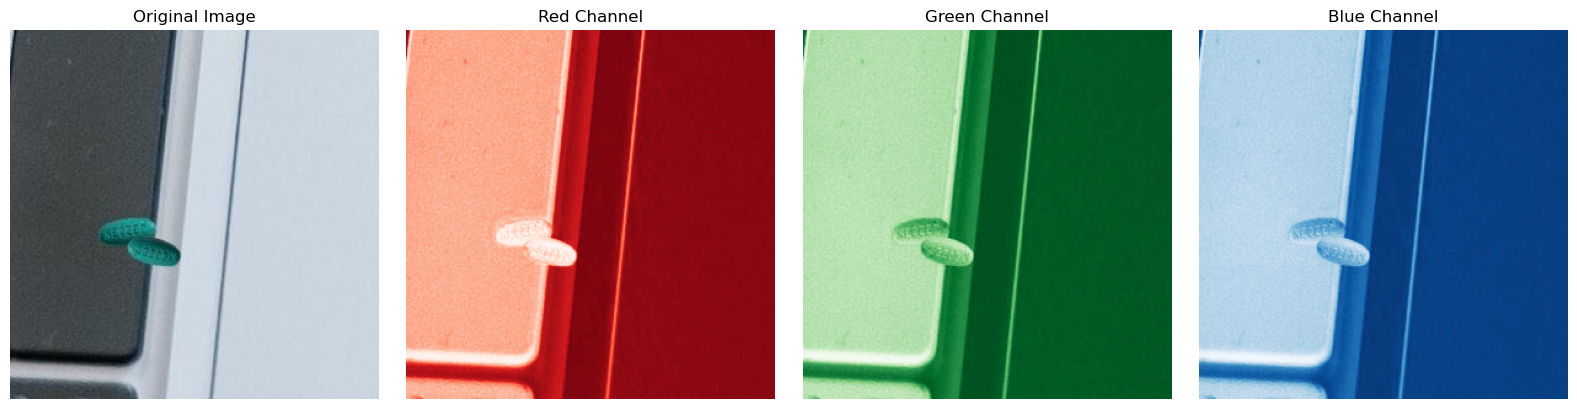

In [13]:
# display all three channels side by side
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# original image
axes[0].imshow(samp_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# red channel
axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title('Red Channel')
axes[1].axis('off')

# green channel
axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title('Green Channel')
axes[2].axis('off')

# blue channel
axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title('Blue Channel')
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# actual pixel values in a small 5x5 region
small_patch = samp_array[50:55, 50:55, 0]

print("Pixel values from a 5x5 patch (Red channel):")
print(small_patch)

Pixel values from a 5x5 patch (Red channel):
[[66 68 69 69 69]
 [66 69 70 69 69]
 [68 70 68 66 65]
 [72 71 66 61 59]
 [71 69 64 60 59]]


## Sample image quality check

In [15]:
! pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   -- ------------------------------------- 2.4/39.0 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/39.0 MB 10.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/39.0 MB 9.1 MB/s eta 0:00:04
   ------- -------------------------------- 7.1/39.0 MB 8.4 MB/s eta 0:00:04
   --------- ------------------------------ 9.4/39.0 MB 8.9 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/39.0 MB 9.3 MB/s eta 0:00:03
   --------------- ------------------------ 15.2/39.0 MB 10.2 MB/s eta 0:00:03
   ------------------ --------------------- 18.1/39.0 MB 10.7 MB/s eta 0:00:02
   --------------------- ------------------ 21.0/39.0 MB 10.9 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/39.0 MB 11.3 MB/s eta 0:00:02
   --------------------------- ------------ 27.0/39.0 MB 11.5 MB/s eta 0:00:02
   ------------------------------- -------- 30.4/39.0 MB 11.8 MB/s eta

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.6 which is incompatible.


In [37]:
# combination of two sources that I found online
# https://unimatrixz.com/blog/latent-space-measuring-image-quality-sharpness-clarity-resolution/
# https://forum.opencv.org/t/scoring-the-clarity-of-an-image/16268
import cv2
import numpy as np
from PIL import Image

def analyze_image_quality(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # sharpness
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpness = laplacian.var()

    # sontrast
    contrast = image.std()

    # resolution (using Sobel operator)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    resolution = np.mean(sobel)

    threshold = 100

    if sharpness > threshold:
        print(f"The image is not blurry, Laplacian operator variance: {sharpness:.2f}")
    else:
        print(f"The image is blurry, Laplacian operator variance: {sharpness:.2f}")

    return {
        "sharpness": sharpness.round(2),
        "resolution": resolution.round(2)
    }

In [38]:
analyze_image_quality(samp_image_path)

The image is not blurry, Laplacian operator variance: 123.91


{'sharpness': 123.91, 'resolution': 330.23}

## EDA visualization

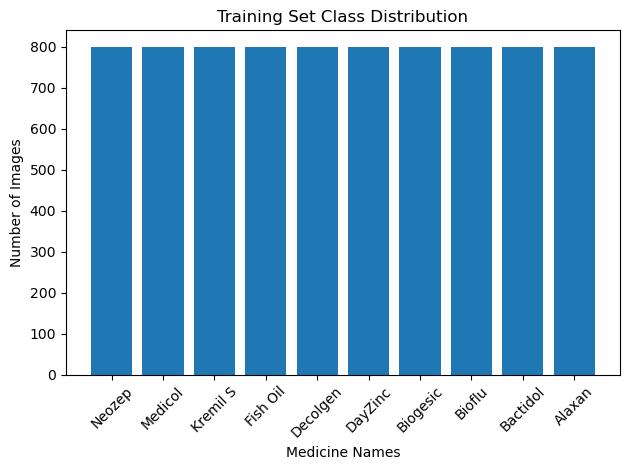

In [15]:
names = [
    "Neozep", "Medicol", "Kremil S", "Fish Oil", "Decolgen","DayZinc", "Biogesic", "Bioflu", 
    "Bactidol", "Alaxan"
]

counts = [
    train_neozep, train_medicol, train_kremils, train_fishoil, train_decolgen, train_dayzinc, 
    train_biogesic,train_bioflu, train_bactidol, train_alaxan
]

plt.bar(names, counts)
plt.xticks(rotation=45)
plt.xlabel("Medicine Names")
plt.ylabel("Number of Images")
plt.title("Training Set Class Distribution")
plt.tight_layout()
plt.show()

## Creating ImageDataGenerator for training data

In [16]:
train_data = ImageDataGenerator(
    rescale = 1./255, # normalize pixels value to 0-1
    rotation_range = 40, # rotating images up 40 degrees
    width_shift_range = 0.2, # randomly shifting horizontally by 20%
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [17]:
val_data = ImageDataGenerator(
    rescale = 1./255
)

## Create data generators from directories

In [18]:
target_size = (150,150)

train_generator = train_data.flow_from_directory(
    train_dir,
    target_size = target_size,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 8000 images belonging to 10 classes.


In [19]:
val_generator = val_data.flow_from_directory(
    validation_dir,
    target_size = target_size,
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 2000 images belonging to 10 classes.


## Visualize Data Augmentation

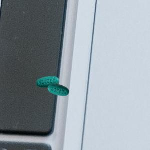

In [20]:
sample_path_img = os.path.join(sample_dir,'00000000.jpg')
sample_img = image.load_img(sample_path_img,target_size=target_size)
sample_img

In [21]:
arr = image.img_to_array(sample_img)
arr_image = arr.reshape((1,)+arr.shape).shape
arr_image

(1, 150, 150, 3)

In [22]:
samp_arr = image.img_to_array(sample_img)
# samp_arr.shape
samp_arr = samp_arr.reshape((1,)+(150, 150, 3))
samp_arr
samp_arr = image.img_to_array(sample_img)
# samp_arr.shape
samp_arr = samp_arr.reshape((1,)+(150, 150, 3))
samp_arr

array([[[[195., 205., 217.],
         [ 43.,  53.,  62.],
         [ 36.,  45.,  50.],
         ...,
         [205., 215., 225.],
         [206., 216., 226.],
         [206., 216., 226.]],

        [[193., 203., 215.],
         [ 30.,  40.,  49.],
         [ 54.,  63.,  68.],
         ...,
         [205., 215., 225.],
         [205., 215., 225.],
         [205., 215., 225.]],

        [[193., 203., 215.],
         [ 21.,  31.,  40.],
         [ 63.,  72.,  77.],
         ...,
         [205., 215., 225.],
         [204., 214., 224.],
         [204., 214., 224.]],

        ...,

        [[ 59.,  66.,  74.],
         [ 66.,  73.,  81.],
         [ 59.,  66.,  74.],
         ...,
         [203., 213., 223.],
         [204., 214., 224.],
         [204., 214., 224.]],

        [[ 69.,  76.,  84.],
         [ 68.,  75.,  83.],
         [ 81.,  88.,  96.],
         ...,
         [201., 211., 221.],
         [203., 213., 223.],
         [202., 212., 222.]],

        [[ 68.,  75.,  83.],
       

In [23]:
# made another ImageDataGenerator specifically for the augmented images 
# so that it does not rescale twice
aug_train_data = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

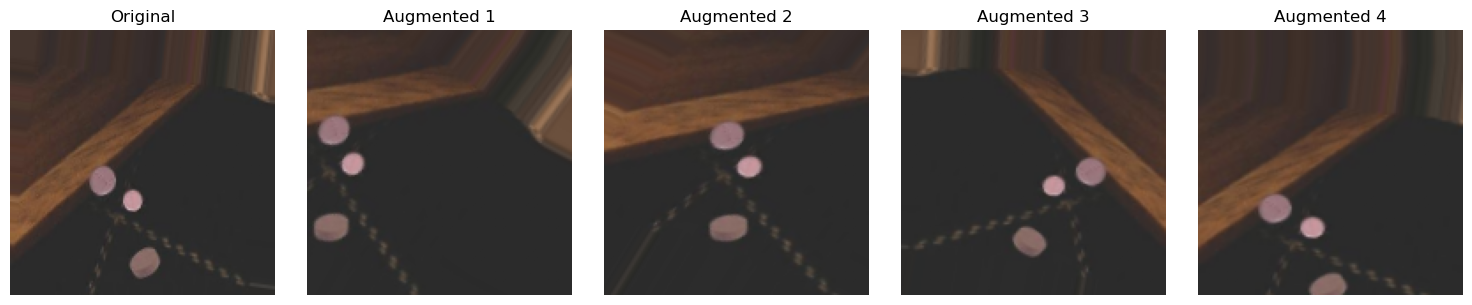

In [24]:
def visualize_augmentation(generator, num_images=5):
    """Visualize augmented versions of a single image."""
    # Get a batch of images
    x_batch, y_batch = next(generator)
    
    # Take the first image
    img = x_batch[0]
    
    # Create augmented versions
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Generate augmented versions
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)
    
    aug_iter = aug_train_data.flow(img_array, batch_size=1)
    
    for i in range(1, num_images):
        batch = next(aug_iter)
        aug_img = batch[0]
        axes[i].imshow(aug_img)
        axes[i].set_title(f'Augmented {i}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_augmentation(train_generator)

## Building the model

In [25]:
model = Sequential([
    Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (150,150,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(units = 512,activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units = 10,activation = 'softmax'),
])

C:\Users\ASUS\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    BatchNormalization(),  # Add after Conv layers too
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(256, (3,3), activation='relu', padding='same'), 
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    GlobalAveragePooling2D(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

C:\Users\ASUS\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 459,722 (1.75 MB)

 Trainable params: 458,250 (1.75 MB)

 Non-trainable params: 1,472 (5.75 KB)

## Compiling the model

In [27]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

## Train the model

In [28]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True,
)

In [29]:
history = model.fit(train_generator,epochs=20,validation_data=val_generator,callbacks=[early_stopping])

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 175s 683ms/step - accuracy: 0.1056 - loss: 2.9789 - val_accuracy: 0.0990 - val_loss: 2.3707
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 166s 665ms/step - accuracy: 0.1646 - loss: 2.4962 - val_accuracy: 0.1060 - val_loss: 2.4087
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 165s 660ms/step - accuracy: 0.3154 - loss: 1.9624 - val_accuracy: 0.1880 - val_loss: 2.1716
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 164s 654ms/step - accuracy: 0.5914 - loss: 1.1351 - val_accuracy: 0.5420 - val_loss: 1.3239
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 169s 674ms/step - accuracy: 0.7719 - loss: 0.6793 - val_accuracy: 0.5795 - val_loss: 1.0886
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 175s 699ms/step - accuracy: 0.8511 - loss: 0.4751 - val_accuracy: 0.7910 - val_loss: 0.7050
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 167s 667ms/step - accuracy: 0.8823 - loss: 0.3959 - val_accuracy: 0.8675 - val_loss: 0.4474
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 167s 668ms/step - accuracy: 0.8935 -

## Save the trained model

In [30]:
saved_model = model.save('pill.keras')

## Evaluating the trained results

<Axes: >

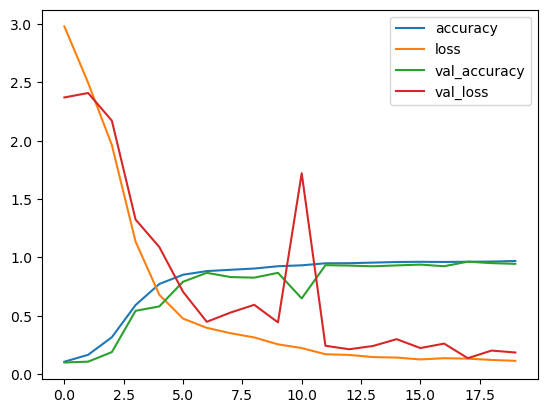

In [31]:
pd.DataFrame(history.history).plot()

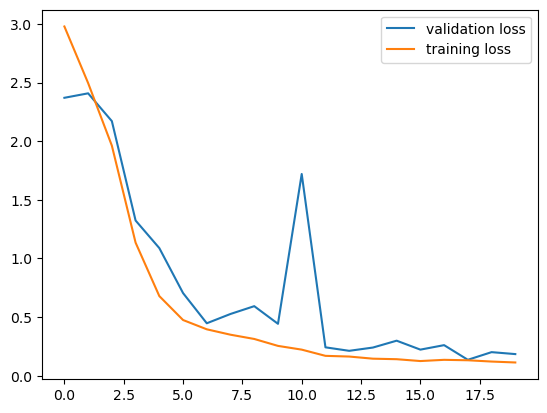

In [32]:
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['loss'],label='training loss')
plt.legend()
plt.show()

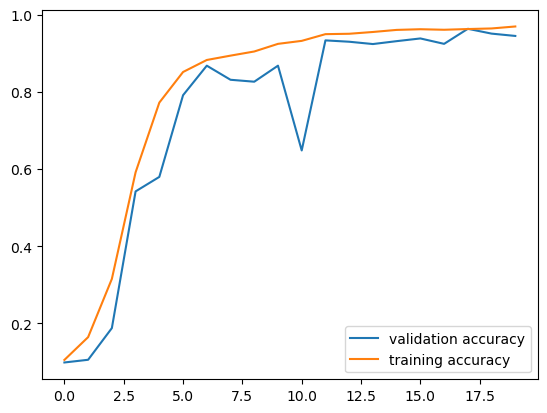

In [33]:
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.plot(history.history['accuracy'],label='training accuracy')
plt.legend()
plt.show()

In [34]:
train_generator.class_indices

{'Alaxan': 0,
 'Bactidol': 1,
 'Bioflu': 2,
 'Biogesic': 3,
 'DayZinc': 4,
 'Decolgen': 5,
 'FishOil': 6,
 'KremilS': 7,
 'Medicol': 8,
 'Neozep': 9}

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


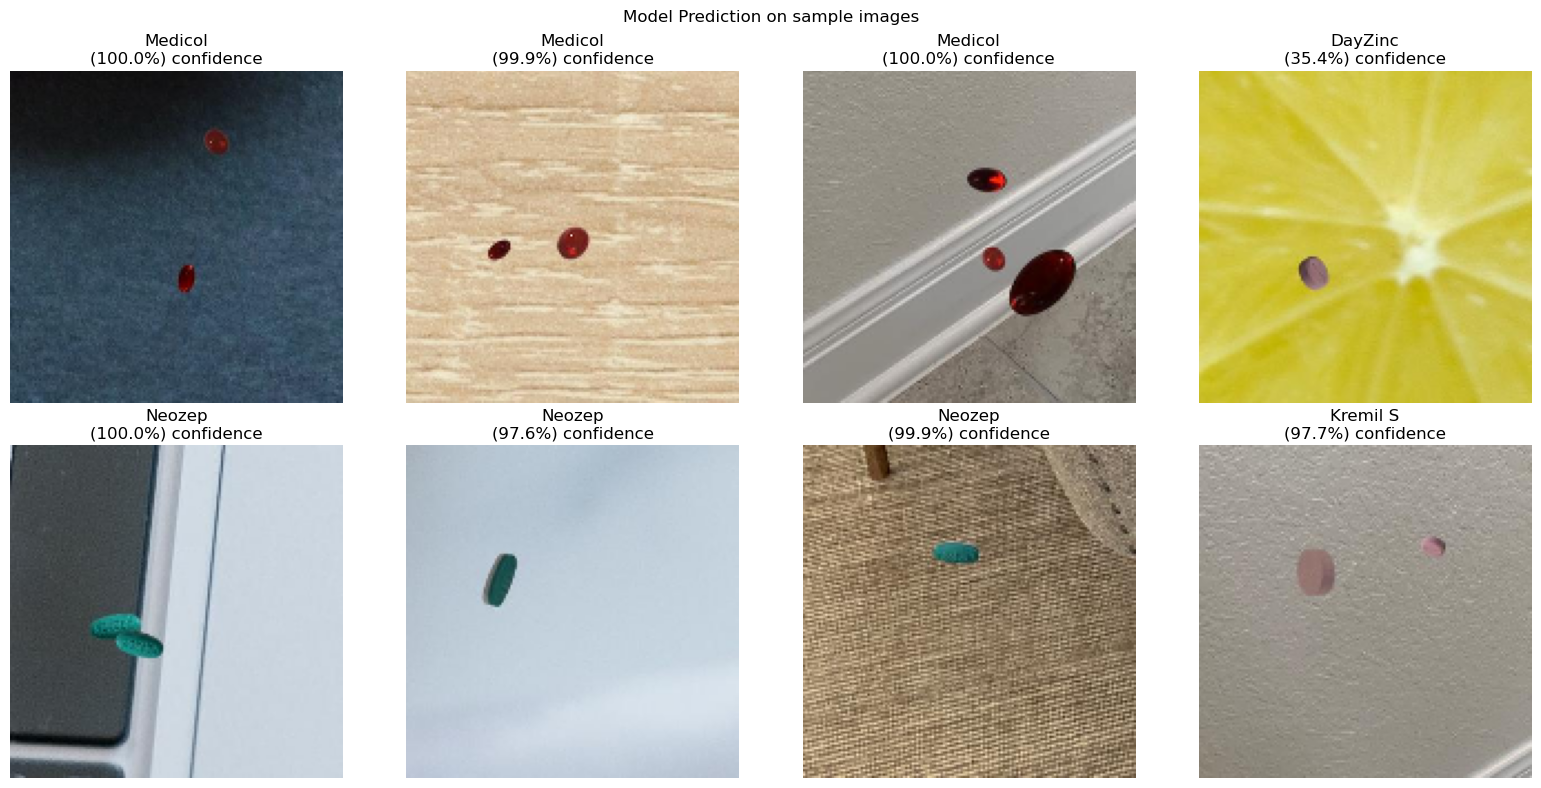

In [35]:
# used categorical instead of sparse (1st try)
sample_images = [f for f in os.listdir(sample_dir) if f.endswith(('.jpg','.jpeg','.png','.webp'))]

fig,axes = plt.subplots(2,4,figsize=(16,8))
axes = axes.flatten()

for i, img_name in enumerate(sample_images[:8]):
    img_path = os.path.join(sample_dir,img_name)
    img = image.load_img(img_path, target_size=(150,150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = img_array/255.0

    class_names = [
        'Alaxan', 'Bactidol', 'Bioflu', 'Biogesic', 'DayZinc', 'Decolgen', 'Fish Oil', 
        'Kremil S', 'Medicol', 'Neozep'
    ]

    pred = model.predict(img_array)

    class_index = np.argmax(pred[0]) # ai-generated
    confidence = pred[0][class_index] * 100 # ai-generated
    label = class_names[class_index]
    
    axes[i].imshow(img)
    axes[i].set_title(f'{label}\n({confidence:.1f}%) confidence')
    axes[i].axis('off')
plt.suptitle('Model Prediction on sample images')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


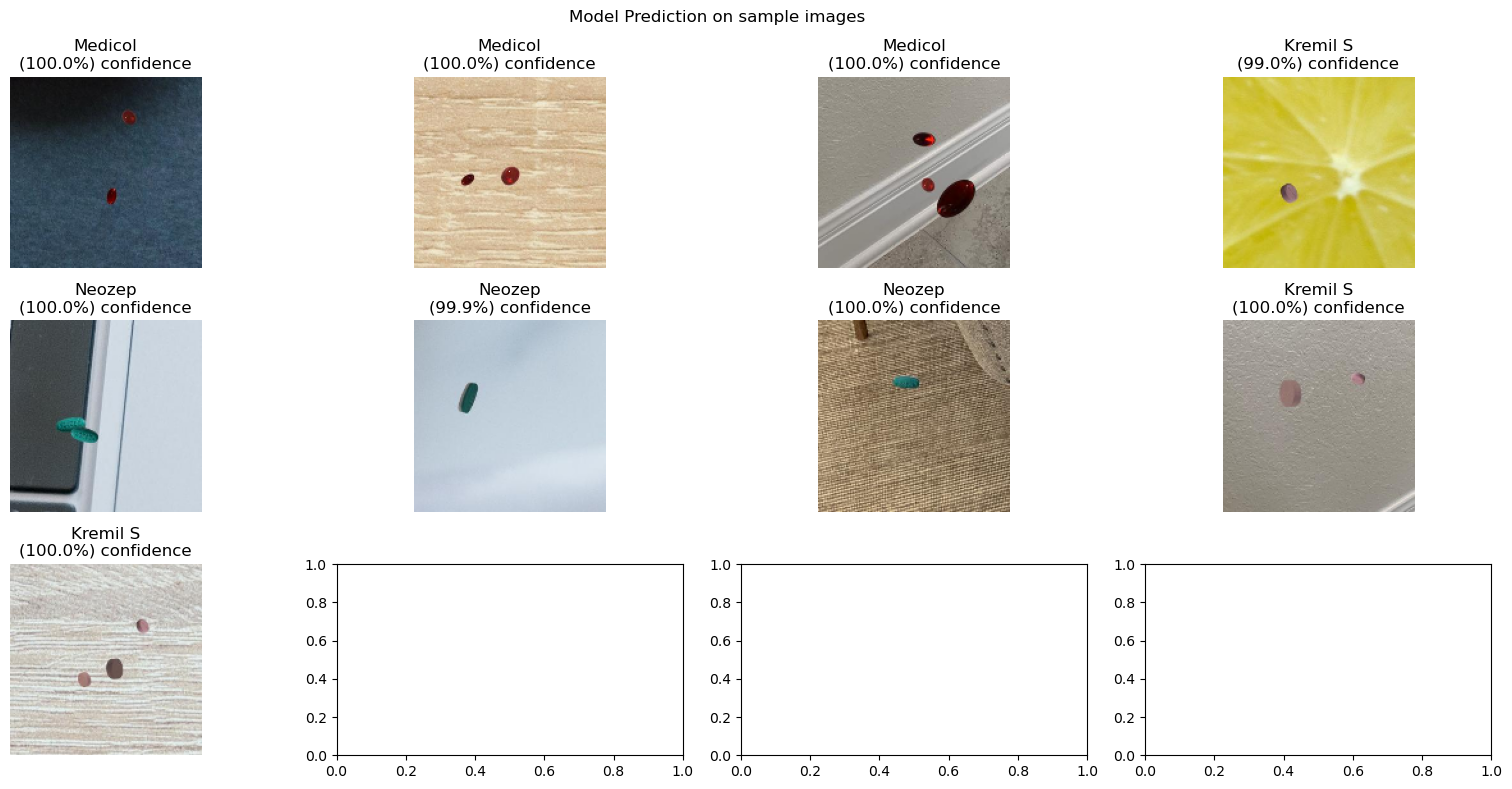

In [35]:
# used categorical instead of sparse (FINAL)
sample_images = [f for f in os.listdir(sample_dir) if f.endswith(('.jpg','.jpeg','.png','.webp'))]

fig,axes = plt.subplots(3,4,figsize=(16,8))
axes = axes.flatten()

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_dir,img_name)
    img = image.load_img(img_path, target_size=(150,150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = img_array/255.0

    class_names = [
        'Alaxan', 'Bactidol', 'Bioflu', 'Biogesic', 'DayZinc', 'Decolgen', 'Fish Oil', 
        'Kremil S', 'Medicol', 'Neozep'
    ]

    pred = model.predict(img_array)

    class_index = np.argmax(pred[0]) # ai-generated
    confidence = pred[0][class_index] * 100 # ai-generated
    label = class_names[class_index]
    
    axes[i].imshow(img)
    axes[i].set_title(f'{label}\n({confidence:.1f}%) confidence')
    axes[i].axis('off')
plt.suptitle('Model Prediction on sample images')
plt.tight_layout()
plt.show()

In [36]:
y_pred = model.predict(val_generator)

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step


In [37]:
val_generator.classes

array([0, 0, 0, ..., 9, 9, 9])

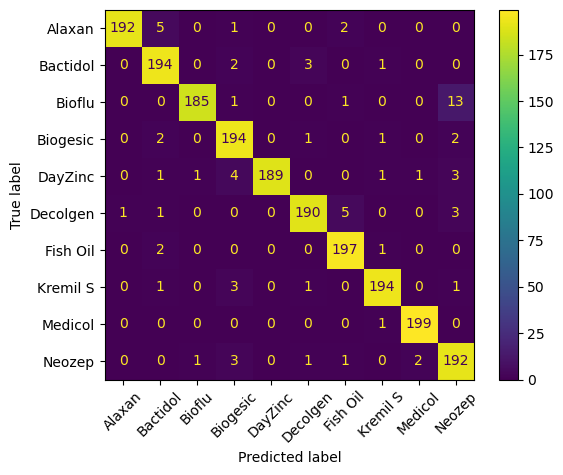

In [38]:
true_classes = val_generator.classes
pred_classes = np.argmax(y_pred, axis=1)
class_names = [
    'Alaxan', 'Bactidol', 'Bioflu', 'Biogesic', 'DayZinc', 'Decolgen', 'Fish Oil', 
    'Kremil S', 'Medicol', 'Neozep'
]

ConfusionMatrixDisplay.from_predictions(true_classes,pred_classes,display_labels=class_names)
plt.xticks(rotation=45)
plt.show()

In [40]:
! pip install streamlit